### NMF notebook
Show how NMF can determine movie topics based on user ratings.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
movie_df = pd.read_csv('den19_movie_ratings.csv')

In [29]:
movie_df.head()

,Name,21 Jump Street,28 Days Later,A Beautiful Mind,About Time,Air Force One,Airplane!,Alien,Aliens,American Gangster,Annihilation,Apollo 13,Back to the Future,Battle of Algiers,Big Lebowski,Black Orpheus,Blade Runner,Boondock Saints,City of God,Clerks,Count of Monte Cristo,Dazed and Confused,Deadpool,Deathproof,Dirty Rotten Scoundrels,Eternal Sunshine of the Spotless Mind,Ex Machina,Gattaca,Girl with a Pearl Earring,Gladiator,Good Will Hunting,Guardians of the Galaxy,Guardians of the Galaxy II,Harold and Maude,Heavyweights,Hitchhiker's Guide to the Galaxy,Hot Fuzz,I Tonya,Inception,Interstellar,Kingsman,LOTR: The Two Towers,Love and Basketball,Mississippi Masala,Monty Python and the Holy Grail,Moonlight,Natural Born Killers,Nausicaa,Office Space,On the Run Tour: Beyoncé & Jay-Z,On the Waterfront,Phantom of the Opera,Predator,Pride and Prejudice,Princess Bride,Pulp Fiction,Queen of Versailles,Rounders,Save the Last Dance,Saving Private Ryan,Scott Pilgrim vs. The World,Serenity,Shaun of the Dead,Shawshank Redemption,Snatched,Spirited Away,Style Wars,The Book Thief,The Dark Knight,The Departed,The Godfather,The Intouchables,The Life Aquatic w. Steve Zissou,The Martian,The Pianist,Thor: Ragnarok,Three Billboards Outside Ebbing Missouri,Tron: Legacy,War Games,Wayne's World
0,Kayla Thomas,5.0,NaN,4.0,10.0,3.0,NaN,NaN,NaN,4.0,NaN,4.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,2,NaN,NaN,3.0,5.0,6.0,NaN,NaN,NaN,6.0,NaN,NaN,4.0,7.0,NaN,NaN,3.0,7.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,9.0,9.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,7.0,9.0,NaN,NaN,NaN,6.0,6.0,6.0,NaN,3.0,NaN,6.0,NaN,7.0,NaN,NaN,2.0
1,Alex Truby,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5,NaN,NaN,NaN,NaN,NaN,9.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,8.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,9.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,10.0,NaN,8.0,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,NaN,NaN
2,Allen Chezick,NaN,NaN,6.0,NaN,7.0,7.0,9.0,9.0,8.0,6.0,9.0,10,NaN,8.0,NaN,6.0,7.0,NaN,6.0,NaN,6.0,8.0,NaN,NaN,NaN,7.0,19.0,NaN,8.0,8.0,8.0,8.0,NaN,NaN,NaN,3.0,7.0,6.0,10.0,7.0,9.0,NaN,NaN,8.0,NaN,6.0,NaN,9.0,NaN,NaN,NaN,10.0,NaN,8.0,9.0,NaN,NaN,NaN,9.0,7.0,NaN,7.0,8.0,6.0,NaN,NaN,7.0,7.0,NaN,7.0,NaN,NaN,7.0,NaN,6.0,NaN,6.0,NaN,9.0
3,Ann Strange,5.0,NaN,8.0,NaN,9.0,9.0,7.0,7.0,8.0,NaN,9.0,9,NaN,9.0,NaN,7.0,NaN,NaN,4.0,NaN,5.0,8.0,NaN,9.0,NaN,NaN,9.0,NaN,9.0,10.0,9.0,9.0,NaN,NaN,9.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,8.0,NaN,6.0,NaN,10.0,NaN,NaN,6.0,7.0,9.0,10.0,9.0,NaN,9.0,NaN,8.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,6.0,7.0,NaN,9.0,NaN,NaN,8.0,9.0,9.0,NaN,6.0,NaN,5.0
4,Carly Ferguson,6.0,8.0,7.0,NaN,6.0,8.0,NaN,NaN,7.0,NaN,7.0,7,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,6.0,5.0,NaN,NaN,6,6.0,9.0,NaN,8.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,7.0,NaN,NaN,8.0,NaN,NaN,9.0,4.0,NaN,NaN,NaN,NaN,8.0,9.0,8.0,NaN,NaN,5.0,6.0,5.0,NaN,8.0,NaN,8.0,10.0,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pd.set_option("display.max_columns",100)

In [31]:
movie_df

,Name,21 Jump Street,28 Days Later,A Beautiful Mind,About Time,Air Force One,Airplane!,Alien,Aliens,American Gangster,Annihilation,Apollo 13,Back to the Future,Battle of Algiers,Big Lebowski,Black Orpheus,Blade Runner,Boondock Saints,City of God,Clerks,Count of Monte Cristo,Dazed and Confused,Deadpool,Deathproof,Dirty Rotten Scoundrels,Eternal Sunshine of the Spotless Mind,Ex Machina,Gattaca,Girl with a Pearl Earring,Gladiator,Good Will Hunting,Guardians of the Galaxy,Guardians of the Galaxy II,Harold and Maude,Heavyweights,Hitchhiker's Guide to the Galaxy,Hot Fuzz,I Tonya,Inception,Interstellar,Kingsman,LOTR: The Two Towers,Love and Basketball,Mississippi Masala,Monty Python and the Holy Grail,Moonlight,Natural Born Killers,Nausicaa,Office Space,On the Run Tour: Beyoncé & Jay-Z,On the Waterfront,Phantom of the Opera,Predator,Pride and Prejudice,Princess Bride,Pulp Fiction,Queen of Versailles,Rounders,Save the Last Dance,Saving Private Ryan,Scott Pilgrim vs. The World,Serenity,Shaun of the Dead,Shawshank Redemption,Snatched,Spirited Away,Style Wars,The Book Thief,The Dark Knight,The Departed,The Godfather,The Intouchables,The Life Aquatic w. Steve Zissou,The Martian,The Pianist,Thor: Ragnarok,Three Billboards Outside Ebbing Missouri,Tron: Legacy,War Games,Wayne's World
0,Kayla Thomas,5.0,NaN,4.0,10.0,3.0,NaN,NaN,NaN,4.0,NaN,4.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,2,NaN,NaN,3.0,5.0,6.0,NaN,NaN,NaN,6.0,NaN,NaN,4.0,7.0,NaN,NaN,3.0,7.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,9.0,9.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,7.0,9.0,NaN,NaN,NaN,6.0,6.0,6.0,NaN,3.0,NaN,6.0,NaN,7.0,NaN,NaN,2.0
1,Alex Truby,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5,NaN,NaN,NaN,NaN,NaN,9.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,8.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,9.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,10.0,NaN,8.0,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,NaN,NaN
2,Allen Chezick,NaN,NaN,6.0,NaN,7.0,7.0,9.0,9.0,8.0,6.0,9.0,10,NaN,8.0,NaN,6.0,7.0,NaN,6.0,NaN,6.0,8.0,NaN,NaN,NaN,7.0,19.0,NaN,8.0,8.0,8.0,8.0,NaN,NaN,NaN,3.0,7.0,6.0,10.0,7.0,9.0,NaN,NaN,8.0,NaN,6.0,NaN,9.0,NaN,NaN,NaN,10.0,NaN,8.0,9.0,NaN,NaN,NaN,9.0,7.0,NaN,7.0,8.0,6.0,NaN,NaN,7.0,7.0,NaN,7.0,NaN,NaN,7.0,NaN,6.0,NaN,6.0,NaN,9.0
3,Ann Strange,5.0,NaN,8.0,NaN,9.0,9.0,7.0,7.0,8.0,NaN,9.0,9,NaN,9.0,NaN,7.0,NaN,NaN,4.0,NaN,5.0,8.0,NaN,9.0,NaN,NaN,9.0,NaN,9.0,10.0,9.0,9.0,NaN,NaN,9.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,8.0,NaN,6.0,NaN,10.0,NaN,NaN,6.0,7.0,9.0,10.0,9.0,NaN,9.0,NaN,8.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,6.0,7.0,NaN,9.0,NaN,NaN,8.0,9.0,9.0,NaN,6.0,NaN,5.0
4,Carly Ferguson,6.0,8.0,7.0,NaN,6.0,8.0,NaN,NaN,7.0,NaN,7.0,7,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,6.0,5.0,NaN,NaN,6,6.0,9.0,NaN,8.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,7.0,NaN,NaN,8.0,NaN,NaN,9.0,4.0,NaN,NaN,NaN,NaN,8.0,9.0,8.0,NaN,NaN,5.0,6.0,5.0,NaN,8.0,NaN,8.0,10.0,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Christopher Sanchez,NaN,NaN,7.0,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,10,NaN,7.0,NaN,10.0,7.0,NaN,NaN,7.0,8.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,6.0,10.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,10.0,6.0,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,8.0,9.0,NaN,NaN,10.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8.0,9.0,10.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,7.0,NaN,6.0
6,Chun Wu,10.0,NaN,10.0,NaN,8.0,10.0,10.0,10.0,10.0,NaN,10.0,10,NaN,8.0,NaN,8.0,NaN,NaN,7.0,8.0,NaN,10.0,NaN,NaN,NaN,NaN,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,8.0,NaN,10.0,NaN,NaN,NaN,10.0,7.0,10.0,10.0,NaN,10.0,NaN,10.0,7.0,8.0,8.0,10.0,9.0,10.0,NaN,NaN,10.0,10.0,8.0,9.0,NaN,NaN,NaN,10.0,NaN,3.0,10.0,10.0
7,Devon Silk,7.0,7.0,NaN,NaN,5.0,8.0,7.0,9.0,6.0,NaN,7.0,10,NaN,9.0,NaN,6.0,7.0,8.0,7.0,4.0,7.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,10.0,9.0,7.0,7.0,NaN,NaN,6.0,8.0,NaN,7.0,8.0,5.0,10.0,NaN,NaN,8.0,NaN,1.0,NaN,9.0,NaN,NaN,NaN,10.0,NaN,10.0,8.0,NaN,6.0,NaN,10.0,5.0,NaN,7.0,9.0,NaN,NaN,NaN,NaN,8.0,7.0,5.0,NaN,7.0,NaN,NaN,9.0,NaN,5.0,7.0,8.0
8,Gordon Pisciotta,8.0

In [32]:
movie_df.columns

Index(['Name', '21 Jump Street', '28 Days Later', 'A Beautiful Mind',
       'About Time', 'Air Force One', 'Airplane!', 'Alien', 'Aliens',
       'American Gangster', 'Annihilation', 'Apollo 13', 'Back to the Future',
       'Battle of Algiers', 'Big Lebowski', 'Black Orpheus', 'Blade Runner',
       'Boondock Saints', 'City of God', 'Clerks', 'Count of Monte Cristo',
       'Dazed and Confused', 'Deadpool', 'Deathproof',
       'Dirty Rotten Scoundrels', 'Eternal Sunshine of the Spotless Mind',
       'Ex Machina', 'Gattaca', 'Girl with a Pearl Earring', 'Gladiator',
       'Good Will Hunting', 'Guardians of the Galaxy',
       'Guardians of the Galaxy II', 'Harold and Maude', 'Heavyweights',
       'Hitchhiker's Guide to the Galaxy', 'Hot Fuzz', 'I Tonya', 'Inception',
       'Interstellar', 'Kingsman', 'LOTR: The Two Towers',
       'Love and Basketball', 'Mississippi Masala',
       'Monty Python and the Holy Grail', 'Moonlight', 'Natural Born Killers',
       'Nausicaa', 'Office 

In [33]:
# clean up data frame
movie_df.columns = [col.lower().replace(' ', '_') for col in movie_df.columns]
movie_df.fillna(0, inplace = True)
movie_df.set_index('name', inplace = True)
movie_df.replace({" " : 0}, inplace = True) # Who put in a space!
movie_df = movie_df.apply(pd.to_numeric)

In [34]:
# sanity check
movie_df.head()
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Kayla Thomas to Jenny
Data columns (total 79 columns):
21_jump_street                              25 non-null float64
28_days_later                               25 non-null float64
a_beautiful_mind                            25 non-null float64
about_time                                  25 non-null float64
air_force_one                               25 non-null float64
airplane!                                   25 non-null float64
alien                                       25 non-null float64
aliens                                      25 non-null float64
american_gangster                           25 non-null float64
annihilation                                25 non-null float64
apollo_13                                   25 non-null float64
back_to_the_future                          25 non-null int64
battle_of_algiers                           25 non-null float64
big_lebowski                                25 non-null fl

## NMF for topic analysis: motivation

You've seen with PCA and SVD that you can decompose a matrix (in this running example, of users, movies, and their ratings of the movies) into latent topics that help relate groups of movies (or words, or books, or whatever your features are in the matrix). 


In [35]:
from numpy.linalg import svd

mat = movie_df.values
movies = movie_df.columns
names = movie_df.index

# Compute SVD
U, sigma, VT = svd(mat)

# do 3 topics...for now 
k = 3
topics = ['latent_topic_{}'.format(i) for i in range(k)]

# Keep top k concepts for comparison
U = U[:,:k]
sigma = sigma[:k]
VT = VT[:k,:]

# Make pretty
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
U = pd.DataFrame(U, index = names, columns = topics)
VT = pd.DataFrame(VT, index = topics, columns = movies)

print('\nMatrix U: people-topic')
print(U)
print('\nMatrix S: singular values')
print(sigma)
print('\nMatrix V: topic-movies')
print(VT)


Matrix U: people-topic
                     latent_topic_0  latent_topic_1  latent_topic_2
name                                                               
Kayla Thomas                  -0.10           -0.23            0.06
Alex Truby                    -0.12           -0.27           -0.09
Allen Chezick                 -0.25            0.23            0.03
Ann Strange                   -0.25            0.13           -0.17
Carly Ferguson                -0.16           -0.31            0.08
Christopher Sanchez           -0.19            0.18           -0.05
Chun Wu                       -0.30            0.26           -0.07
Devon Silk                    -0.25            0.19            0.11
Gordon Pisciotta              -0.25            0.15            0.20
Grant Verploeg                -0.15            0.22           -0.04
Ian Hetterich                 -0.24            0.13           -0.35
Jeffrey Johannsen             -0.15           -0.03            0.48
Jessica Curley          

## Problems with SVD for topic analysis

**Recall:** $M = U S V^T$

Values in $U$ and $V^T$ can be negative, which is weird and hard to interpret. For example, suppose a latent feature is the genre 'Sci-fi'. This feature can be positive (makes sense), zero (makes sense), or negative (what does that mean?).

In [36]:
# Let's try using NMF instead....
k = 3 # number of topics
from sklearn.decomposition import NMF
nmf = NMF(n_components = k)
nmf.fit(mat)

W = nmf.transform(mat)
H = nmf.components_

W = pd.DataFrame(W, index = names, columns = topics)
H = pd.DataFrame(H, index = topics, columns = movies)

W,H = (np.around(x,2) for x in (W, H))

# this shows the components 
print(W.head(30), '\n\n', H.head(k))

                     latent_topic_0  latent_topic_1  latent_topic_2
name                                                               
Kayla Thomas                   0.00            2.26            1.18
Alex Truby                     0.00            3.73            0.28
Allen Chezick                  3.77            0.00            1.59
Ann Strange                    3.47            1.83            0.21
Carly Ferguson                 0.00            3.11            2.24
Christopher Sanchez            3.13            0.19            0.46
Chun Wu                        4.54            0.81            0.99
Devon Silk                     3.24            0.00            2.29
Gordon Pisciotta               2.90            0.00            2.87
Grant Verploeg                 2.63            0.00            0.52
Ian Hetterich                  3.40            2.19            0.00
Jeffrey Johannsen              0.05            0.00            4.55
Jessica Curley                 0.09            1

In [37]:
# check reconstructions

# stop truncation
np.set_printoptions(threshold=np.nan)
# prevent exponential notation
np.set_printoptions(suppress=True)

# original matrix
print("\nOriginal matrix")
print(mat)

# # svd reconstruction
# print("\nSVD reconstruction")
# print('\n', np.around(np.dot(U, np.diag(sigma)).dot(VT), 2))

# # nmf reconstruction
print("\nNMF reconstruction")
print('\n', np.around(W.dot(H), 2))


Original matrix
[[ 5.  0.  4. 10.  3.  0.  0.  0.  4.  0.  4.  5.  0.  0.  0.  0.  0.  0.
   0.  9.  0.  0.  0.  0.  2.  0.  0.  3.  5.  6.  0.  0.  0.  6.  0.  0.
   4.  7.  0.  0.  3.  7.  0.  4.  0.  0.  0.  4.  0.  0.  4.  0.  9.  9.
   0.  0.  0.  5.  4.  0.  0.  0.  7.  9.  0.  0.  0.  6.  6.  6.  0.  3.
   0.  6.  0.  7.  0.  0.  2.]
 [ 4.  0.  8.  0.  0.  0.  0.  0.  0.  0.  6.  5.  0.  0.  0.  0.  0.  9.
   0.  6.  0.  0.  0.  0.  0.  0.  0.  0. 10. 10.  8.  0.  0.  0.  0.  0.
   0.  9.  0.  0.  8.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  9.  8.
   9.  0.  0.  7.  0.  0.  0.  0. 10.  0.  8.  0.  5.  7.  0.  0.  0.  0.
   0.  9.  0.  9.  0.  0.  0.]
 [ 0.  0.  6.  0.  7.  7.  9.  9.  8.  6.  9. 10.  0.  8.  0.  6.  7.  0.
   6.  0.  6.  8.  0.  0.  0.  7. 19.  0.  8.  8.  8.  8.  0.  0.  0.  3.
   7.  6. 10.  7.  9.  0.  0.  8.  0.  6.  0.  9.  0.  0.  0. 10.  0.  8.
   9.  0.  0.  0.  9.  7.  0.  7.  8.  6.  0.  0.  7.  7.  0.  7.  0.  0.
   7.  0.  6.  0.  6.  0.  9.]
 [

## Interpreting Concepts
#### Think of NMF like 'fuzzy clustering'
- The concepts are clusters
- Each row (document, user, etc...) can belong to more than one concept

#### Top Questions:
1. What do the concepts (clusters) mean?
2. To which concept(s) does each user/document belong?

### What are the topics?

In [38]:
# Top 10 movies in topic 0
tpic = 0
num_movies = 10
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['predator', 'aliens', 'blade_runner', 'thor:_ragnarok',
       'guardians_of_the_galaxy_ii', 'guardians_of_the_galaxy',
       'lotr:_the_two_towers', 'good_will_hunting', 'saving_private_ryan',
       'alien'],
      dtype='object')

In [39]:
# Top 10 movies in topic 1
tpic = 1
num_movies = 10
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['princess_bride', 'the_dark_knight', 'pride_and_prejudice',
       'spirited_away', 'monty_python_and_the_holy_grail',
       'back_to_the_future', 'inception', '21_jump_street', 'airplane!',
       'guardians_of_the_galaxy'],
      dtype='object')

In [40]:
# Top 10 movies in topic 2
tpic = 2
num_movies = 10
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['the_godfather', 'boondock_saints', 'the_departed', 'pulp_fiction',
       'dazed_and_confused', 'gladiator', 'shawshank_redemption', 'inception',
       'office_space', 'ex_machina'],
      dtype='object')

### Which users align with concept 0?

In [41]:
# Top 5 users for topic 0
tpic = 0
top_users = W.iloc[:,tpic].sort_values(ascending=False).index[:5]
top_users

Index(['Chun Wu', 'Allen Chezick', 'Ann Strange', 'Ian Hetterich',
       'Devon Silk'],
      dtype='object', name='name')

In [42]:
# Top 5 users for topic 1
tpic = 1
top_users = W.iloc[:,tpic].sort_values(ascending=False).index[:5]
top_users

Index(['Jenny', 'Riley McClellan', 'Alex Truby', 'Lisa Beatty',
       'Carly Ferguson'],
      dtype='object', name='name')

In [43]:
# Top 5 users for topic 2
tpic = 2
top_users = W.iloc[:,tpic].sort_values(ascending=False).index[:5]
top_users

Index(['Thomas Bakke', 'Jeffrey Johannsen', 'Jessica Curley',
       'Casey (John) Olson', 'Chris Reger '],
      dtype='object', name='name')

### What concepts does do I align with?

In [44]:
# feel free to fill in your name and check it out for yourself 
W.loc['Kayla Thomas']

latent_topic_0    0.00
latent_topic_1    2.26
latent_topic_2    1.18
Name: Kayla Thomas, dtype: float64

In [45]:
# these are the movies associated with the latent topic I align most with  
H.loc['latent_topic_1'].sort_values(ascending=False).head()

princess_bride                     2.10
the_dark_knight                    1.73
pride_and_prejudice                1.64
spirited_away                      1.61
monty_python_and_the_holy_grail    1.55
Name: latent_topic_1, dtype: float64

### What are all the movies in each topic?

In [46]:
# Number of movies in each concept
thresh = .6  # movie is included if at least 50% of max weight
for g in range(k):
    all_movies = H.iloc[g,:]
    included = H.columns[all_movies >= (thresh * all_movies.max())]
    print("\nTopic %i contains: %s" % (g, ', '.join(included)))


Topic 0 contains: air_force_one, alien, aliens, apollo_13, back_to_the_future, big_lebowski, blade_runner, gattaca, gladiator, good_will_hunting, guardians_of_the_galaxy, guardians_of_the_galaxy_ii, lotr:_the_two_towers, predator, pulp_fiction, saving_private_ryan, thor:_ragnarok, tron:_legacy, wayne's_world

Topic 1 contains: 21_jump_street, a_beautiful_mind, airplane!, back_to_the_future, guardians_of_the_galaxy, inception, monty_python_and_the_holy_grail, pride_and_prejudice, princess_bride, spirited_away, the_dark_knight

Topic 2 contains: 28_days_later, american_gangster, big_lebowski, boondock_saints, dazed_and_confused, eternal_sunshine_of_the_spotless_mind, ex_machina, gladiator, hot_fuzz, inception, office_space, pulp_fiction, saving_private_ryan, shaun_of_the_dead, shawshank_redemption, the_departed, the_godfather


### Which users are associated with each topic?

In [47]:
# Users in each concept
thresh = .3  # movie is included if at least 30% of max weight
for g in range(k):
    all_users = W.iloc[:,g]
    included = W.index[all_users >= (thresh * all_users.max())]
    print("\nTopic {} contains: {}".format(g, ', '.join(included)))


Topic 0 contains: Allen Chezick, Ann Strange, Christopher Sanchez, Chun Wu, Devon Silk, Gordon Pisciotta, Grant Verploeg, Ian Hetterich, Casey (John) Olson, Joseph Wilson, Lisa Beatty, Alex Rose, Chris Reger 

Topic 1 contains: Kayla Thomas, Alex Truby, Ann Strange, Carly Ferguson, Ian Hetterich, Joseph Wilson, Lisa Beatty, Riley McClellan, Samantha Buck, Stephen Lynch, Alex Rose, Chris Reger , Jenny

Topic 2 contains: Allen Chezick, Carly Ferguson, Devon Silk, Gordon Pisciotta, Jeffrey Johannsen, Jessica Curley, Casey (John) Olson, Samantha Buck, Stephen Lynch, Thomas Bakke, Chris Reger 


## Choosing number of topics by looking at reconstruction error

Text(0, 0.5, 'Reconstruction Error')

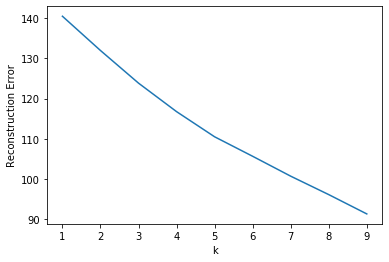

In [51]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(k):
    nmf = NMF(n_components=k)
    nmf.fit(mat)
    W = nmf.transform(mat);
    H = nmf.components_;
    return nmf.reconstruction_err_

error = [fit_nmf(i) for i in range(1,10)]
plt.plot(range(1,10), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Error')


### Some other stuff you may find helpful with your assignment....

In [52]:
A = np.array([[1, 2], [-3, 4]])
b = np.array([7, -9])

print(np.linalg.solve(A, b))

[4.6 1.2]


### Least Squares Solver

What if we have an overdetermined system of linear equations? E.g.

$$ \begin{bmatrix} 1 & 2 \\ -3 & 4 \\ 1 & -4 \end{bmatrix} \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] = \left[ \begin{array}{cc} 7 \\ -9 \\ 17 \end{array} \right] $$

An exact solution is not guaranteed, so we must do something else. Least Squares dictates that we find the $x$ that minimizes the residual sum of squares (RSS).

(Note: This is the solver we use when doing Linear Regression!)

In [53]:
A = np.array([[1, 2], [-3, 4], [1, -4]])
b = np.array([7, -9, 17])

print(np.linalg.lstsq(A, b)[0])


[ 2.88 -1.38]


/Users/kayla.thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [54]:
A.clip(min=0)

array([[1, 2],
       [0, 4],
       [1, 0]])

### Non-negative Least Squares Solver

What if you want to constrain the solution to be non-negative? (Doing such a thing will be important to us today.)

We have optomizers for that too!

In [28]:
from scipy.optimize import nnls

A = np.array([[1, 2], [-3, 4], [1, -4]])
b = np.array([7, -9, 17])

print(nnls(A, b))

(array([4.63636364, 0.        ]), 13.5109383295704)
